# Midterm Exam

The data for this exam is a subset of the forest cover type data that has been used in several machine learning publications.  Find the subset of the data that you should use for the exam in my [Data GitHub repository](https://github.com/esnt/Data/tree/main/Forest) in the file called `forest.csv` ("Forest" folder in the main Data repo). 

Please include the requested code (and ONLY the requested code) in the appropriate cells below the questions.  Extra code that you used for exploring the data, building and evaluating models, and anything else, should be *well-documented* and included at the end of the notebook. As you answer the questions below, keep the following in mind:

* There is not necessarily a "best" model that I am expecting you to find
* You do not need to try every single type of model that we have learned in class, but I am interested in the reasons that you chose to use or not use certain models.
* I should be able to run your notebook without error
* You should not use ChatGPT or similar tool to help you write the code or answer the questions, but you are allowed to use the books, LearningSuite, and the internet.

When you are finished, be sure this completed .ipynb file is in the GitHub repository.  

### Variables

Here is a description of the variables included in the data.  The target is `Cover_Type`.

**Name / Data Type / Measurement / Description**

* Elevation / quantitative /meters / Elevation in meters
* Aspect / quantitative / azimuth / Aspect in degrees azimuth
* Slope / quantitative / degrees / Slope in degrees
* Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
* Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
* Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
* Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
* Wilderness_Area / qualitative / A1-A4 / Wilderness area designation
* Soil_Type  / qualitative / S1-S40 / Soil Type designation
* Cover_Type (2 types) / integer / 1 and 2 / Forest Cover Type designation (original data has 7 types)

## 1. Import libraries
Import all the libraries that are necessary for running your code. 

In [67]:
# code here
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Print the version of pandas and scikit-learn that you are using but running the cell below.  

In [37]:
import sklearn
import pandas as pd
print("Pandas: "+ pd.__version__)
print("Sklearn: "+ sklearn.__version__)

Pandas: 1.5.3
Sklearn: 1.3.0


---
## 2. Import the data

Import the data

In [38]:
# code here
forest = pd.read_csv('forest.csv')
print(forest.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3194.0   124.0   13.0                             713.0   
1     3079.0     5.0   13.0                               0.0   
2     2978.0    24.0   11.0                             134.0   
3     3084.0    10.0   13.0                             300.0   
4     2644.0   339.0   12.0                             150.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                            89.0                           2854.0   
1                             0.0                           2842.0   
2                            16.0                           4682.0   
3                            67.0                           1398.0   
4                            22.0                            618.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          241.0           231.0          117.0   
1          202.0           213.0          147.0   
2          214.0           216.0   

---
## 3.  Process the data as you see fit

Cover_Type
1.0    3129.285598
2.0    2920.862450
Name: Elevation, dtype: float64


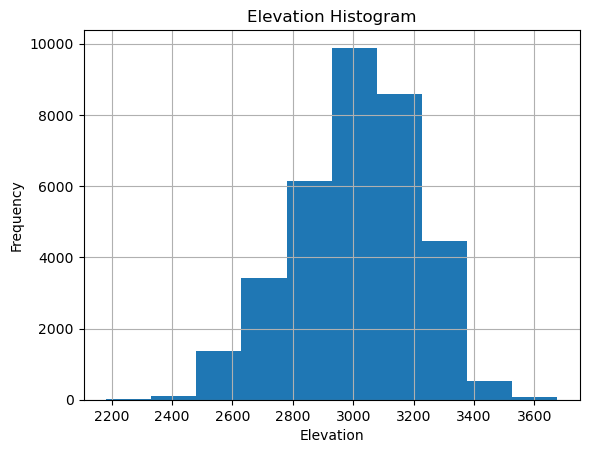

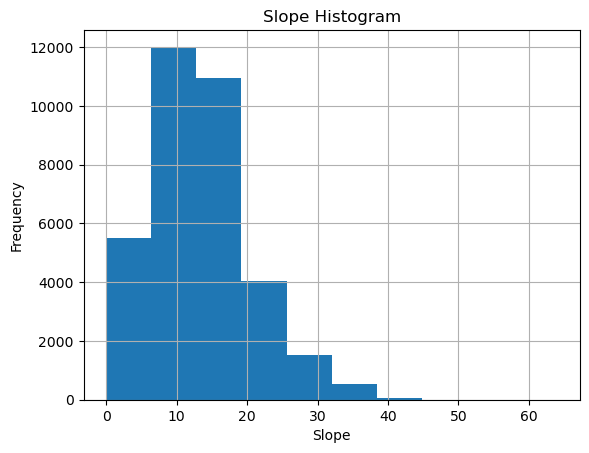

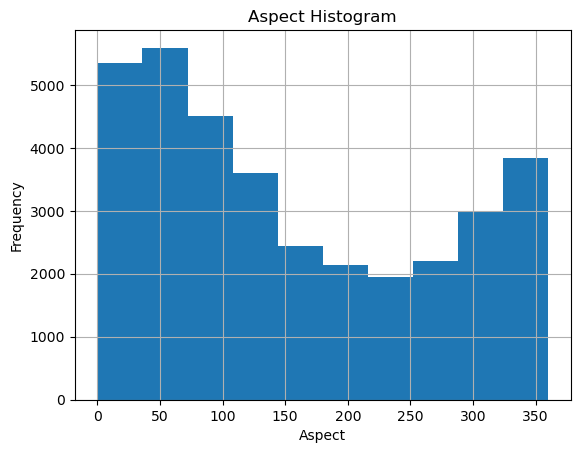

In [22]:
# this gives basic statistics about numeric columns in forest data to help you understand the distributin of it all.
#forest.describe()

filtered_data = forest[forest['Elevation'] > 3000]
#filtered_data.describe()

elevation_by_cover = forest.groupby('Cover_Type')['Elevation'].mean()
print(elevation_by_cover)

forest['Elevation'].hist()
plt.title('Elevation Histogram')
plt.xlabel('Elevation')
plt.ylabel('Frequency')
plt.show()

forest['Slope'].hist()
plt.title('Slope Histogram')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

forest['Aspect'].hist()
plt.title('Aspect Histogram')
plt.xlabel('Aspect')
plt.ylabel('Frequency')
plt.show()

#### In the markdown cell below, describe the way you decided to process the data and the reasons behind those choices

I first used the describe() function to look at the main data and the statistics in all of these numerical columns. This was to help me better understand the distribution of it all.

Then I filtered the data to have an elevation above 3000 to see if there was as wide of a distribution using the describe() function again. 

Then I grouped the data by cover type and calculated the mean elevation. The mean elevation for cover type 1 is higher than type 2.

Then I made a histogram of some of the different variables to look at their distribution visually. It was interesting to see the different shapes of the graphs. I don't yet know what it all means, but just another way to view the data. 

---
## 4. Fit a classification model

For this part, you should build an appropriate classification model that is **NOT** an ensemble.  This model should have optimized hyperparameters.   Report the generalization (1) accuracy, (2) F1, and (3) AUC.

Include only the code that fits the model and computes your best estimates of the generalization metrics.   

For example, the code in the box should be something like:
```
clf = MyBestClassifier(hyperparameters = tuned_values)
# code to fit model (not commented)
# code to compute generalization metrics (not commented)
print(accuracy)
print(F1)
print(AUC)
```

In [39]:
# code here

# F - one hot encoding for categorical columns 
columns_to_encode = ['Soil_Type', 'Wilderness_Area']
forest = pd.get_dummies(forest, columns = columns_to_encode)


# A
X = forest.drop(columns = ['Cover_Type'])
y = forest['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# B
clf = DecisionTreeClassifier()

# C 
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

# D
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# E
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'weighted')
y_probs = best_clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)

print('Accuracy: ', accuracy)
print('F1 Score: ', f1)
print('AUC: ', auc)



Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.3s
[CV] END max_depth=10, 

#### In the markdown cell below, describe the process that you used to build your model.

Be sure to include why or why not you chose to consider different (non-ensemble) models that we've learned about and how you optimized any relevant hyperparameters in your final model.

A. I split the data into the features and target variable. Cover Type is the target variable and the other columns are features for this problem. Then i create the training and testing sets

B. Then I chose Decision Tree classifier as the classification algorithm. It is simple and a non elastic classifier and well suited for initial modeling and interpretation.

C. Then i performed the hyperparameter tuning using GridSearchCV. I performed 3 fold cross validations and it evaluates the different combinations of hyperparameters to find the best set with the different values I provided for max depth, min samples split, and min samples leaf. 

D. Then I selected the best classifier from the grid search results. This 'best_clf' has the hyperparameters that will yield the best cross-validated performance. Then I trained this best model on the training set. 

E. I sued the trained model to make predictions from the testing set and then calculted accuracy, f1, and the auc. 

F. Ran into some errors at the end because the model wasn't handling non-numeric data directly, so i encoded categorical variables with pd.get_dummies.

#### Final Answers 
Accuracy: .79
F1 Score: .79
AUC: .86

---
## 5. Fit another classification model

For this part, you should build an appropriate classification model that IS an ensemble and report the generalization (1) accuracy, (2) F1, and (3) AUC.

Include only the code that fits the model and computes your best estimates of the generalization metrics. 

In [40]:
# D - Data Preprocessing
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# A - Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# B - Fit the model to the training data
rf_clf.fit(X_train_imputed, y_train)

# C - Make predictions on the test data
y_rf_pred = rf_clf.predict(X_test_imputed)

# Calculate accuracy, F1 score, and AUC
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred, average='weighted')
y_rf_probs = rf_clf.predict_proba(X_test_imputed)[:, 1]
rf_auc = roc_auc_score(y_test, y_rf_probs)

# Print the metrics for the Random Forest model
print('Random Forest Accuracy: ', rf_accuracy)
print('Random Forest F1 Score: ', rf_f1)
print('Random Forest AUC: ', rf_auc)


Random Forest Accuracy:  0.8792256573244727
Random Forest F1 Score:  0.8790314807414319
Random Forest AUC:  0.9457068113234306


#### In the markdown cell below, describe the process that you used to build your model.

Be sure to include why or why not you chose to consider different (ensemble) models that we've learned about and how you optimized any relevant hyperparameters in your final model.

A. I chose the Random Forest Classifer as the ensemble method because it combines different decision trees to improve model performance. It is robust and able to handle complex data, and resists overfitting. Then I trained it on the training data from the previous problem. This builds an ensemble of trees from the training data.

B. Then I use that trained random forest model to make predictions based on the test data.

C. Then I find the accuracy and F1 scor and auc for this random forest model. 

D. There were some missing values in my data set and Random Forest Classifier does not handle these missing values so I used data imputation at the beginnging to fill in missing values with appropriate values based on the mean of the column. 

#### Final Answers
Accuracy: .88
F1 Score: .88
AUC: .95

---
## 6.  Generalization Metrics

In the markdown cell below, describe how you chose to estimate and compute the generalization metrics.  That is, tell me how you computed to metrics to ensure that they are good estimates for how the model will perform on new data.  

To estimate and compute the generalization metrics, i used the standard approach that we've done in class.  For accuracy, I compared the model's predictions to the actual target labels on the test dataset. For both models, accuracy was pretty high. This givces an estimate of the model's overall correctness in classification. But it is not enough just by itself. F1 score is a mean of precision and recall. It measures the proportion of true positive predictions out of all positive predictions, and the recall measures the proportion of true positive predictions out of all real positives. It balances the trade off between precision and recall with the imbalanced class distribution, so i computed this using the weighted average which accounts for the class imbalance. And then AUC evaluates the model's ability to distinguish between positive and negative classes  when making probabilistic predictions. It summarizes the performance of the ROC curve across various probability thresholds. ANd it gives a good aggregate measure of classification performance that is less sensitive to class distribution imbalances. 

To ensure that these were good estimates, I followed the best practices and patterns that we did in class of splitting the dataset into training and testing sets, and using the RandomForestClassifier because it is more robust and minimizes overfitting. I handled the missing data with imputation. and I sued a random_state parametere to ensure I could get these results again. 

---
## 7. Important variables

Which variables seem to be the most important for the prediction?  Also comment briefly on how you determined which variables are important. If possible, also comment on how the value of the important features affects the prediction. 

In [41]:
feature_importance = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
top_n_features = feature_importance_df.head(10)
top_n_features

,Feature,Importance
0,Elevation,0.276627
5,Horizontal_Distance_To_Roadways,0.098002
9,Horizontal_Distance_To_Fire_Points,0.087554
3,Horizontal_Distance_To_Hydrology,0.064803
4,Vertical_Distance_To_Hydrology,0.061344
1,Aspect,0.058511
7,Hillshade_Noon,0.056098
8,Hillshade_3pm,0.052107
6,Hillshade_9am,0.050906
2,Slope,0.041454


I made this data frame of the feature and its importance based on the information gain achieved by each feature when making split decisions in the decision trees from the Random Forest ensemble.  higher feature importance means that the feature contributes more to the model's ability to make accurate predictions.

Features with higher importance values are more influential in the prediction process. So this top_n_features dataframe is sorted in descending order of importance. The importance of a features shows its impact on the model's decision making. A higher importance equates to a more critical role in determining the outcome of the prediction. Feature importance can also help us with feature selection and identify the ones that we should focus on to simplify the model. 

For this problem, elevation is by far the most important feature for prediction, followed by horizontal distance to roadways and horizontal distance to fire points coming next. 

---
## 8. Make Predictions

Use your best model (the one from either part 4 or part 5) to predict the classes for the instances in the `newdata.csv` file.  Show the code you use to make the prediction and the predictions themselve (there are only 10 new instances, so it is possible print them out)

In [65]:
new_data = pd.read_csv('newdata.csv')
new_data = pd.get_dummies(new_data, columns=['Soil_Type', 'Wilderness_Area'])

new_data = new_data.reindex(columns=X_train_imputed.columns, fill_value=0)

imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_imputed)
new_data_imputed = pd.DataFrame(imputer.transform(new_data), columns=new_data.columns)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_imputed, y_train)

new_data_predictions = rf_clf.predict(new_data_imputed)
print(new_data_predictions)


[2. 1. 2. 2. 2. 1. 2. 2. 2. 2.]


---
## 9.  Regression

Now suppose that you want to predict "Elevation". Repeat steps (2) and (3).  This time use "Elevation" as the target and the other variables (except "Cover_Type") as the predictors.  

In [75]:
# code here
forest = pd.read_csv('forest.csv')
forest_copy = forest.copy()
forest_copy = pd.get_dummies(forest_copy, columns=['Soil_Type', 'Wilderness_Area'])
X = forest_copy.drop(columns=['Elevation'])
y = forest_copy['Elevation']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Run a linear regression model.  Compute the generalization RSME.

In [76]:
forest_copy = forest.copy()
forest_copy = pd.get_dummies(forest_copy, columns=['Soil_Type', 'Wilderness_Area'])
X = forest_copy.drop(columns=['Elevation'])
y = forest_copy['Elevation']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Generalization Rooted Mean Squared Error: ', rmse)


Generalization Rooted Mean Squared Error:  119.76547091266772


Based on the generalization RSME, comment on how well your model performs in the markdown cell below.  For example, to what value should you compare the RMSE to determine if your model as any predictive power?

The generalization RMSE is a measure of the overall predictive performance of the Linear Regression Model. And it's best to compare the RMSE of a certain model to the baseline RMSE (see code below). And  lower RMSE value indicates better model performance. So the Linear Regression Model has an RMSE of 119.76 and when compared to the baseline prediction of the general forest model (which is 202.869), the Linear regression one is better and has more predictive power. 

---
## 10.  Resources

Please tell me all the resources that you used to complete the exam.  Also tell me about how much time it took you.

I opened the midterm on Saturday, and finished in on Monday evening. I probably worked for it for 2 hours on Saturday, and then on Monday for 5-6. 

I used Hands on Machine Learning as well as ISLP and ISLR in the chapters that we've read and covered in class. I used class slides as well as the code that Dr. Tass has submitted in class. I also used some of my previous coded labs to see what kind of code I used for different models. Then I watched some things onf 3Blue1Brown Youtube. I also used DataCamp for syntax with Random forest classification and in trying to fix my errors. 

---
# Additional code

Include the rest of the code that you used to answers the questions.  Please have neat, well commented code.  If you used a .py file, copy and paste your code in the cell below. 

In [79]:
#To compare my linear model's RMSE with a baseline model, I created a simple baseline that predicts the mean of the target variable which is Elevation for this problem.
# This is creating the baseline model
baseline_predictions = np.full_like(forest['Elevation'], forest['Elevation'].mean()) 

# This is calculting the RMSE for the baseline model 
baseline_rmse = np.sqrt(mean_squared_error(forest['Elevation'], baseline_predictions))
print("Baseline RMSE:", baseline_rmse)

# Comparing the two models will help you determine if the model provides meaningful predictive power. 

Baseline RMSE: 202.86998591485016
